# Analiza skupień (ang. clustering)

1.

In [1]:
from matplotlib import pyplot as plt

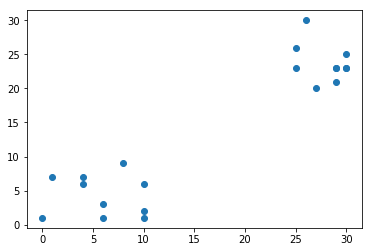

In [2]:
x = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
y = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]

plt.scatter(x,y)
plt.show()

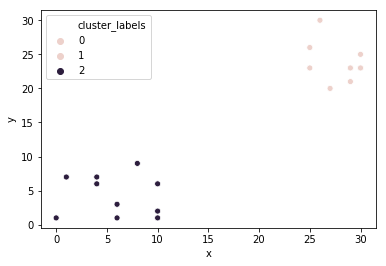

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

temp = {"x": x, "y":y}
df = pd.DataFrame(temp)

Z = linkage(df, "ward")

df["cluster_labels"] = fcluster(Z, 2, criterion='maxclust')

import seaborn as sns

sns.scatterplot(x = "x", y = "y", data=df, hue="cluster_labels")
plt.show()

kmeans, vq

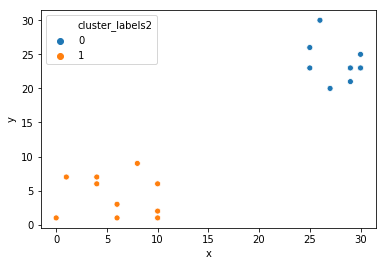

In [4]:
from scipy.cluster.vq import kmeans, vq

df_f = df[["x","y"]].values.astype('float')
centroids, _ = kmeans(df_f, 2)

df.drop("cluster_labels", axis=1, inplace=True)
df["cluster_labels2"],_ = vq(df_f, centroids)

sns.scatterplot(x = "x", y = "y", data=df, hue="cluster_labels2")
plt.show()

In [5]:
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

scaled_data = whiten(goals_for)

scaled_data

array([ 3.07692308,  2.30769231,  1.53846154,  2.30769231,  0.76923077,
        0.76923077,  1.53846154,  0.        ,  0.76923077,  3.07692308])

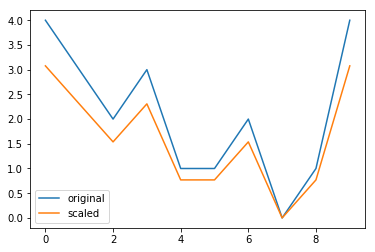

In [6]:
plt.plot(goals_for, label="original")

plt.plot(scaled_data, label="scaled")

plt.legend()
plt.show()

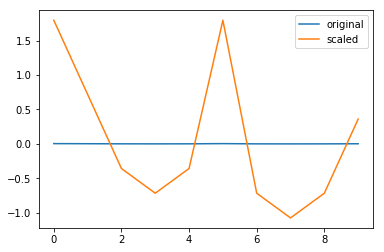

In [7]:
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

scaled_data = whiten(rate_cuts)

plt.plot(rate_cuts, label= "original")
plt.plot(scaled_data, label= 'scaled')
plt.legend()

[]

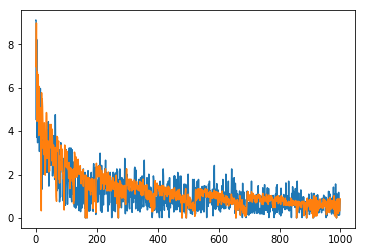

In [8]:
from pandas import read_csv
data = pd.read_csv("fifa_18_sample_data.csv")
scaled_wage = whiten(data['eur_wage'])
scaled_value = whiten(data['eur_value'])

plt.plot(scaled_wage, label = 'scaled_wage')
plt.plot(scaled_value, label = 'scaled_value')
plt.plot()

In [21]:
x = '''0     17
1     20
2     35
3     14
4     37
5     33
6     14
7     30
8     35
9     17
10    11
11    21
12    13
13    10
14    81
15    84
16    87
17    83
18    90
19    97
20    94
21    88
22    89
23    93
24    92
25    82
26    81
27    92
28    91
29    22
30    23
31    25
32    25
33    27
34    17
35    17'''

y = '''
0       4
1       6
2       0
3       0
4       4
5       3
6       1
7       6
8       5
9       4
10      6
11     10
12      8
13     10
14     97
15     94
16     99
17     95
18     95
19     97
20     99
21     99
22     94
23     99
24     90
25     98
26    100
27     93
28     98
29     15
30     10
31      0
32     10
33      7
34     17
35     15'''

In [22]:
from io import StringIO

df_coordinates_x = pd.read_csv(StringIO(x), sep="\s+", engine= "python", header=None, index_col=0, names=["x_coordinate"])
df_coordinates_y = pd.read_csv(StringIO(y), sep="\s+", engine= "python", header=None, index_col=0, names=["y_coordinate"])

In [45]:
comic_con = df_coordinates_x.join(df_coordinates_y)
comic_con

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4
5,33,3
6,14,1
7,30,6
8,35,5
9,17,4


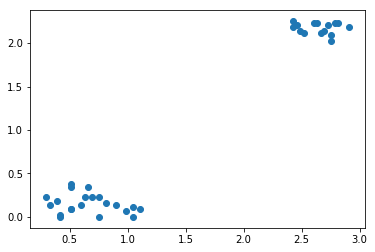

In [59]:
comic_con['x_scaled'] = whiten(comic_con.x_coordinate)
comic_con['y_scaled'] = whiten(comic_con.y_coordinate)
plt.scatter(comic_con.x_scaled, comic_con.y_scaled)

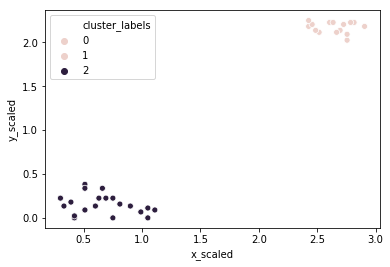

In [60]:
distance_matrix = linkage(comic_con[["x_scaled",'y_scaled']], method = 'ward', metric = 'euclidean')
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')
sns.scatterplot(x='x_scaled', y="y_scaled", hue='cluster_labels', data= comic_con)

ValueError: RGBA sequence should have length 3 or 4

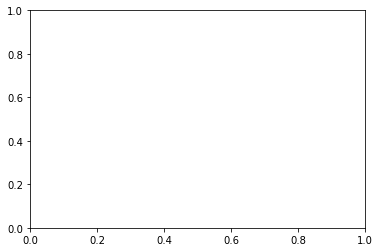

In [61]:
colors = {1: "lightcoral", 2: "peru"}

comic_con.plot.scatter(x = "x_scaled", y = "y_scaled", c=comic_con)

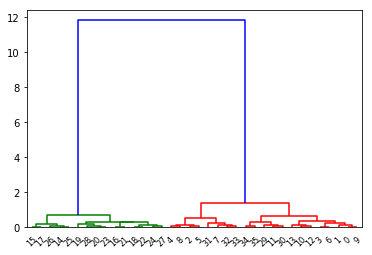

In [62]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)
plt.show()

In [63]:
data["scaled_sliding_tackle"] = whiten(data['sliding_tackle'])
data["scaled_aggresion"] = whiten(data["agression"])

distance_matrix = linkage(data[['scaled_sliding_tackle', 'scaled_aggression']][:20], 'ward')

dn2 = dendogram(distance_matrix)
plt.show()

KeyError: 'agression'

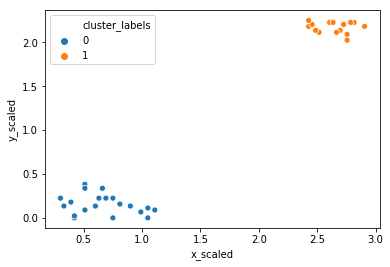

In [65]:
from numpy import random

random.seed(0)
cluster_centers, distorsion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
#comic_con.drop("cluster_lebels", inplace=True, axis=1)

comic_con["cluster_labels"], distorsion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data = comic_con)
plt.show()